In [4]:
from sklearn import datasets

# Load the dataset with optional parameters if needed
diabetes_data = datasets.load_diabetes()


In [5]:
diabetes_data = datasets.load_diabetes(as_frame=True)
X, y = datasets.load_diabetes(return_X_y=True)


### Part1

#### 1. Get the data.

In [7]:
from sklearn import datasets

# Load the Diabetes dataset
diabetes_data = datasets.load_diabetes(as_frame=True)

# Display basic information about the dataset
print(diabetes_data.DESCR)  # Prints the description of the dataset
diabetes_df = diabetes_data.frame  # Converts data to a DataFrame for easier exploration
diabetes_df.head()  # Displays the first few rows of the dataset


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### 2. Frame the Problem. Notice that the dependent variable of diabetes progression, namely "disease progression one year after baseline".

Problem Satement

The goal of this project is to develop a machine learning model that can forecast a patient's likelihood of developing diabetes one year from baseline. In order to enable early intervention and therapy, the model is intended to function as a screening tool to assist medical professionals in identifying people at a higher risk of illness development.

* Dependent Variable (Target):  Disease Progression One Year After Baseline: The numerical representation of the diabetes progression measure is the target variable in this problem. This variable shows the extent to which a patient's condition has gotten worse in the year after the baseline data.

#### 3. EDA - Describe the data, explore it, and provide insights about it. This should include at least: statistics, scatter plots histograms, a correlation matrix, and concise and relevant insights (4 point).

Step 1: Summary Statistics

In [8]:
# Display summary statistics
diabetes_df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


Step 2: Scatter Plots

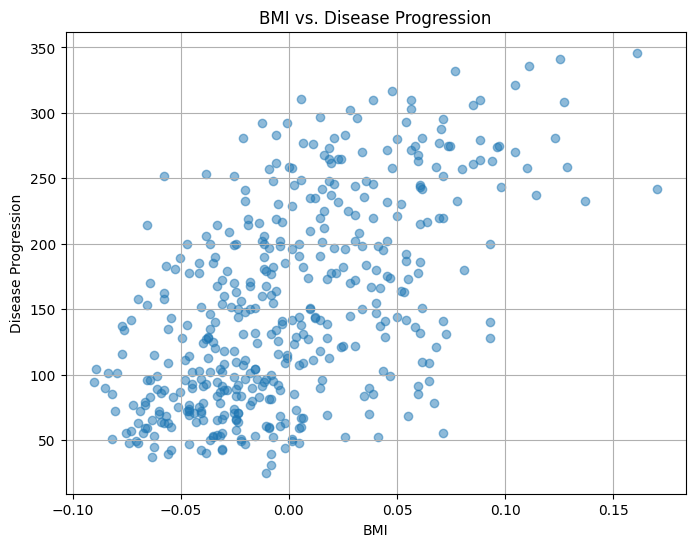

In [10]:
import matplotlib.pyplot as plt

# Scatter plot of BMI vs. disease progression
plt.figure(figsize=(8, 6))
plt.scatter(diabetes_df['bmi'], diabetes_df['target'], alpha=0.5)
plt.title('BMI vs. Disease Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.grid(True)
plt.show()


Step 3: Histograms

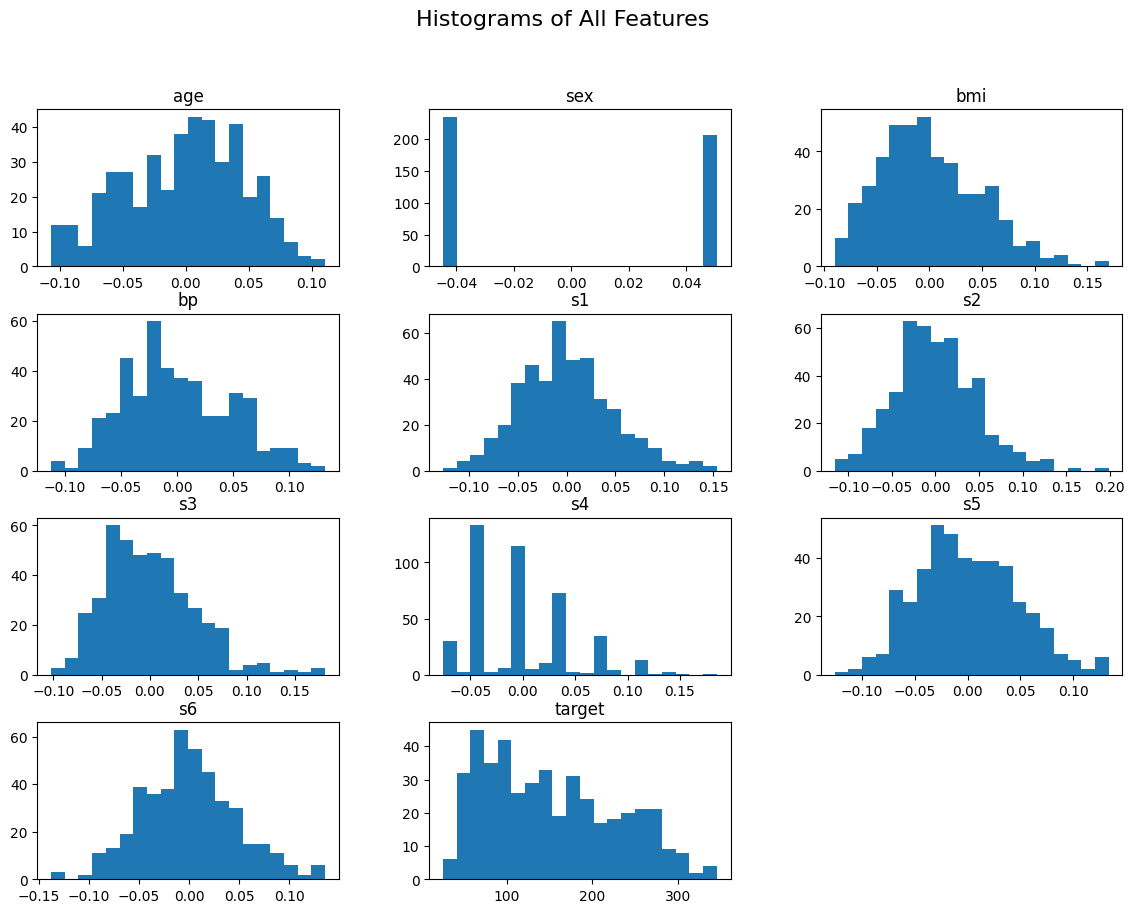

In [12]:
# Plotting histograms for all features
diabetes_df.hist(bins=20, figsize=(14, 10), grid=False)
plt.suptitle('Histograms of All Features', fontsize=16)
plt.show()


Step 4: Correlation Matrix

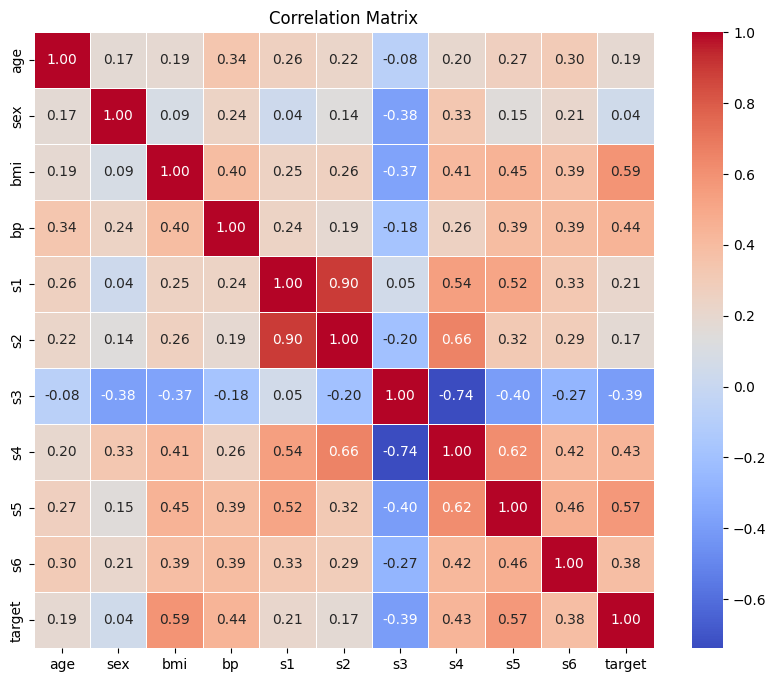

In [13]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = diabetes_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### 4.Clean the data if needed, and explain your reasoning for your reader

Number of duplicate rows: 0


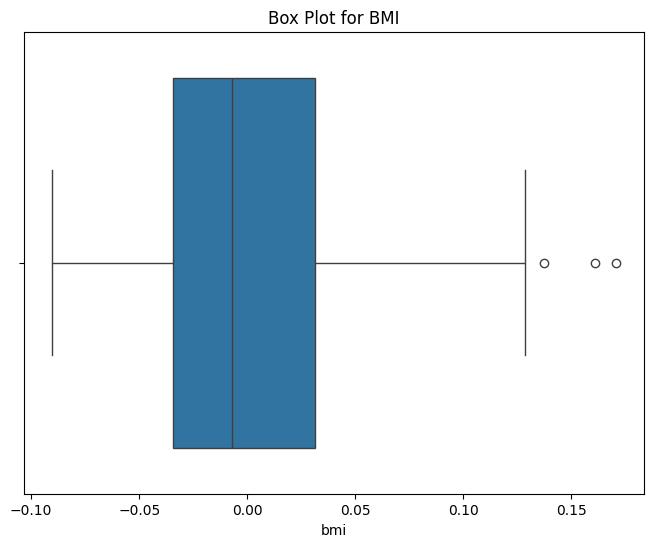

In [14]:
# Check for duplicate rows
duplicate_rows = diabetes_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
# Box plot for detecting outliers in BMI
plt.figure(figsize=(8, 6))
sns.boxplot(x=diabetes_df['bmi'])
plt.title('Box Plot for BMI')
plt.show()
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
diabetes_df_scaled = diabetes_df.copy()
diabetes_df_scaled[diabetes_df.columns[:-1]] = scaler.fit_transform(diabetes_df_scaled[diabetes_df.columns[:-1]])


#### 5. Split the dataset to a train (75%) and validation set (10%), and test set (15%)5. Split the dataset to a train (75%) and validation set (10%), and test set (15%)

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (75%) and temporary set (25%)
X = diabetes_df.drop(columns='target')  # Features
y = diabetes_df['target']                # Target variable

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

# Now split the temporary set into validation (40%) and test (60%)
# Since we have 25% in the temporary set, we need 10% for validation and 15% for testing, which means
# 10 / 25 = 0.4 for validation and 15 / 25 = 0.6 for testing

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Display the sizes of the datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 331 samples
Validation set size: 44 samples
Test set size: 67 samples


### Part 2

#### 6. Models: a univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5 (6 models)

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['Degree', 'Train R2', 'Train MAE', 'Train MAPE', 
                                'Validation R2', 'Validation MAE', 'Validation MAPE'])

# Fit polynomial regression models from degree 0 to 5
for degree in range(6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train[['bmi']])  # Use only the BMI feature
    X_val_poly = poly.transform(X_val[['bmi']])
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Calculate evaluation metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
    
    # Store the results
    results = results.append({
        'Degree': degree,
        'Train R2': train_r2,
        'Train MAE': train_mae,
        'Train MAPE': train_mape,
        'Validation R2': val_r2,
        'Validation MAE': val_mae,
        'Validation MAPE': val_mape
    }, ignore_index=True)

# Display the results
results


C:\Users\pallo\AppData\Local\Temp\ipykernel_7108\3946791133.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\pallo\AppData\Local\Temp\ipykernel_7108\3946791133.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\pallo\AppData\Local\Temp\ipykernel_7108\3946791133.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\pallo\AppData\Local\Temp\ipykernel_7108\3946791133.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\pallo\AppData\Local\Temp\ipykernel_7108\3946791133.py:37: FutureWarning: Th

,Degree,Train R2,Train MAE,Train MAPE,Validation R2,Validation MAE,Validation MAPE
0,0.0,0.000000,66.201641,0.628267,-0.106957,66.057059,0.712639
1,1.0,0.349672,52.287739,0.483629,0.331264,47.208472,0.470600
2,2.0,0.350764,52.207314,0.482985,0.331631,47.213700,0.472397
3,3.0,0.350774,52.198968,0.482807,0.331638,47.185414,0.472227
4,4.0,0.353014,52.092653,0.480533,0.340758,46.090118,0.460503
5,5.0,0.354100,52.059191,0.480040,0.349881,45.462121,0.451753


#### 7. Compare the models using the training and validation data. Construct a table summarizing the train validation results. Each model should have a separate row in the table (3 points):


In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['Degree', 'Train R2', 'Train MAE', 'Train MAPE', 
                                'Validation R2', 'Validation MAE', 'Validation MAPE'])

# Fit polynomial regression models from degree 0 to 5
for degree in range(6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train[['bmi']])  # Use only the BMI feature
    X_val_poly = poly.transform(X_val[['bmi']])
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Calculate evaluation metrics for training set
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    
    # Calculate evaluation metrics for validation set
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
    
    # Store the results
    results = results.append({
        'Degree': degree,
        'Train R2': train_r2,
        'Train MAE': train_mae,
        'Train MAPE': train_mape,
        'Validation R2': val_r2,
        'Validation MAE': val_mae,
        'Validation MAPE': val_mape
    }, ignore_index=True)

# Display the results
results


C:\Users\pallo\AppData\Local\Temp\ipykernel_7108\2259698732.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\pallo\AppData\Local\Temp\ipykernel_7108\2259698732.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\pallo\AppData\Local\Temp\ipykernel_7108\2259698732.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\pallo\AppData\Local\Temp\ipykernel_7108\2259698732.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\pallo\AppData\Local\Temp\ipykernel_7108\2259698732.py:38: FutureWarning: Th

,Degree,Train R2,Train MAE,Train MAPE,Validation R2,Validation MAE,Validation MAPE
0,0.0,0.000000,66.201641,0.628267,-0.106957,66.057059,0.712639
1,1.0,0.349672,52.287739,0.483629,0.331264,47.208472,0.470600
2,2.0,0.350764,52.207314,0.482985,0.331631,47.213700,0.472397
3,3.0,0.350774,52.198968,0.482807,0.331638,47.185414,0.472227
4,4.0,0.353014,52.092653,0.480533,0.340758,46.090118,0.460503
5,5.0,0.354100,52.059191,0.480040,0.349881,45.462121,0.451753


#### 8.Identify the Best Model

In [18]:
# Identify the best model based on Validation R2
best_model = results.loc[results['Validation R2'].idxmax()]
best_model


Degree              5.000000
Train R2            0.354100
Train MAE          52.059191
Train MAPE          0.480040
Validation R2       0.349881
Validation MAE     45.462121
Validation MAPE     0.451753
Name: 5, dtype: float64

#### 9. Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE)

In [19]:
# Prepare the best model for the test set
best_degree = int(best_model['Degree'])
poly_best = PolynomialFeatures(degree=best_degree)
X_test_poly = poly_best.fit_transform(X_test[['bmi']])

# Fit the model on the entire training data
model.fit(poly_best.fit_transform(X_train[['bmi']]), y_train)

# Predictions on the test set
y_test_pred = model.predict(X_test_poly)

# Calculate evaluation metrics for the test set
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Display the results
test_results = {
    'Test R2': test_r2,
    'Test MAE': test_mae,
    'Test MAPE': test_mape
}
test_results


{'Test R2': 0.26669658449530775,
 'Test MAE': 51.75025709277398,
 'Test MAPE': 0.43026713233054426}

#### 10. Plot a graph of the train, validation and test data points, and the fit of the chosen model over each of them.

c:\Users\pallo\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


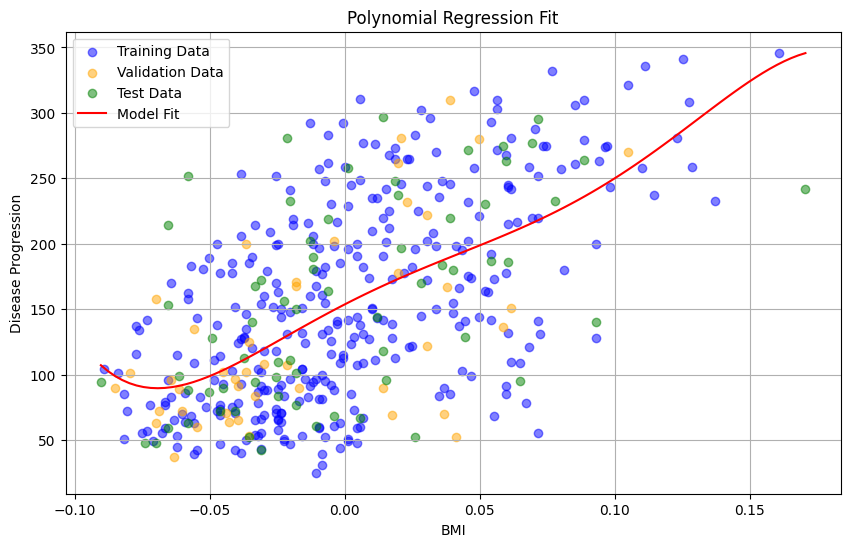

In [20]:
# Plotting the fit of the chosen model
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(X_train['bmi'], y_train, color='blue', label='Training Data', alpha=0.5)
# Scatter plot for validation data
plt.scatter(X_val['bmi'], y_val, color='orange', label='Validation Data', alpha=0.5)
# Scatter plot for test data
plt.scatter(X_test['bmi'], y_test, color='green', label='Test Data', alpha=0.5)

# Create a range of values for BMI
bmi_range = np.linspace(X['bmi'].min(), X['bmi'].max(), 100).reshape(-1, 1)
bmi_poly = poly_best.transform(bmi_range)
# Plot the model fit
plt.plot(bmi_range, model.predict(bmi_poly), color='red', label='Model Fit')

plt.title('Polynomial Regression Fit')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.grid()
plt.show()


#### 11.Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient) 

In [21]:
# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Create the equation as a string
equation_terms = " + ".join([f"{coeff:.2f} * x^{i}" for i, coeff in enumerate(coefficients)])
model_equation = f"y = {intercept:.2f} + {equation_terms}"
model_equation


'y = 153.65 + 0.00 * x^0 + 1059.89 * x^1 + -3824.15 * x^2 + -16770.23 * x^3 + 753722.52 * x^4 + -2993716.57 * x^5'

#### 12. Calculate the expected diabetes progression for a BMI value of your choice using `model.perdict()` for that value

In [22]:
# Example BMI value
chosen_bmi = 25.0  # Replace with your value

# Transform the BMI value to polynomial features
chosen_bmi_poly = poly_best.transform([[chosen_bmi]])

# Predict the diabetes progression
predicted_progression = model.predict(chosen_bmi_poly)
predicted_progression[0]


c:\Users\pallo\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


-28941354951607.42

#### 13. How many trainable parameters are we fitting for each of the models? Explain these values. One way is to use sklearn function `get_feature_names_out()

In [23]:
# Get the number of trainable parameters for the best model
feature_names = poly_best.get_feature_names_out()
num_params = len(feature_names)

num_params


6

#### 14.Summary
With the code and instructions provided, you can execute these steps in your notebook, leading to a thorough understanding of univariate polynomial regression in the context of predicting diabetes progression using BMI. If you have any questions or need further assistance with any step, feel free to ask!

### Part3

* Step 1: Prepare the Data
First, we will ensure that the data is ready for model fitting. We will use the entire dataset for training, validation, and testing as established in earlier steps.

* Step 2: Fit the Models
1. Polynomial Regression Models (Degrees 2 and 3)
We will fit polynomial regression models of degree 2 and 3 using all features.

2. Decision Tree Regression Models
We will fit two decision tree models with different max_depth values (e.g., 3 and 5).

3. k-Nearest Neighbors (kNN) Regression Models
We will fit two kNN models with different values of n_neighbors (e.g., 3 and 5).

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Load the dataset
diabetes_data = datasets.load_diabetes(as_frame=True)
diabetes_df = diabetes_data.frame

# Define features and target variable
X = diabetes_df.drop(columns='target')
y = diabetes_df['target']

# Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Initialize a DataFrame to store the results
model_results = pd.DataFrame(columns=['Model', 'Train R2', 'Train MAE', 'Train MAPE', 
                                      'Validation R2', 'Validation MAE', 'Validation MAPE'])

# 1. Polynomial Regression Models (Degree 2 and 3)
for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)

    # Store results
    model_results = model_results.append({
        'Model': f'Polynomial Degree {degree}',
        'Train R2': train_r2,
        'Train MAE': train_mae,
        'Train MAPE': train_mape,
        'Validation R2': val_r2,
        'Validation MAE': val_mae,
        'Validation MAPE': val_mape
    }, ignore_index=True)

# 2. Decision Tree Regression Models
for max_depth in [3, 5]:
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)

    # Store results
    model_results = model_results.append({
        'Model': f'Decision Tree Depth {max_depth}',
        'Train R2': train_r2,
        'Train MAE': train_mae,
        'Train MAPE': train_mape,
        'Validation R2': val_r2,
        'Validation MAE': val_mae,
        'Validation MAPE': val_mape
    }, ignore_index=True)

# 3. kNN Regression Models
for n_neighbors in [3, 5]:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)

    # Store results
    model_results = model_results.append({
        'Model': f'kNN n_neighbors {n_neighbors}',
        'Train R2': train_r2,
        'Train MAE': train_mae,
        'Train MAPE': train_mape,
        'Validation R2': val_r2,
        'Validation MAE': val_mae,
        'Validation MAPE': val_mape
    }, ignore_index=True)

# Display the results
model_results


C:\Users\pallo\AppData\Local\Temp\ipykernel_7108\4054942634.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({
C:\Users\pallo\AppData\Local\Temp\ipykernel_7108\4054942634.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({
C:\Users\pallo\AppData\Local\Temp\ipykernel_7108\4054942634.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({
C:\Users\pallo\AppData\Local\Temp\ipykernel_7108\4054942634.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({
C:\Users\pallo\AppData\Local\Temp\ip

,Model,Train R2,Train MAE,Train MAPE,Validation R2,Validation MAE,Validation MAPE
0,Polynomial Degree 2,-1.157568,89.589124,0.767537,-1.592851,90.977273,0.950179
1,Polynomial Degree 3,0.693167,34.114804,0.291647,-45.557370,240.886364,2.174989
2,Decision Tree Depth 3,0.509503,44.259855,0.388666,0.198306,48.126248,0.476729
3,Decision Tree Depth 5,0.686693,33.527028,0.299736,0.043519,51.077301,0.489993
4,kNN n_neighbors 3,0.629300,37.137966,0.315974,0.214184,45.795455,0.442421
5,kNN n_neighbors 5,0.570761,40.773414,0.349769,0.358481,43.290909,0.412441
